# I. Introduction to dimensionality reduction

## I.1. The curse of high dimensionality

How long would it take to find a black grain of rice in a bowl of rice? 

Then how long in a restaurant with a lot of bowls of rice, as well as empty bowls...

Finally how long would it take in a field? With water, perhaps other cultures...

![](images/rice_field.jpeg)

Adding more dimensions increase the volume of the space and the available data becomes more sparse: with a lot of emptiness.

This becomes problematic for various usecases, especially for machine learning: in high-dimensional spaces, it requires nigger amount of training data to ensure that there are several samples with each combination of values.

## I.2. Why dimensionality reduction

Why would we need to reduce the dimensionality of our data?
- To prevent this **curse of high dimensionality** - and feed models with non-sparse data and less features
- For **visualizing and interpreting** the data. The human mind is limited to a few dimensions
- To reduce the computation power required

## I.3. Principle

The principle of "reducing the dimensionality" is to project the data along the best axes so that it **keeps the maximum information** (or loses the minimum).

For example, suppose we have multiple points in a 2D dimensional space.

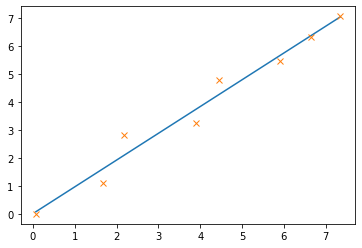

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(8) + np.random.rand(8)
y = np.arange(8) + np.random.rand(8)
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.plot(x, y, 'x')
plt.show()

It would be "almost" as good, to keep only the values of the points projected along the blue line as it contains most of the information.

# II. Implementation with `sklearn`

The signature of the PCA in scikit-learn is the following:

```Python
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)
```

Where basically you mostly have to play with `n_components` that can be either:
- the number of dimensions to keep if you input an `int`
- the minimum variance to be retained if you input a `float` between 0 and 1

In [2]:
from sklearn import datasets

# We load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

We have 4 features (petal lenght and width, sepal length and width), and 3 classes: Setosa, Versicolour, Virginica that are kinds of flowers.

<IPython.core.display.Javascript object>


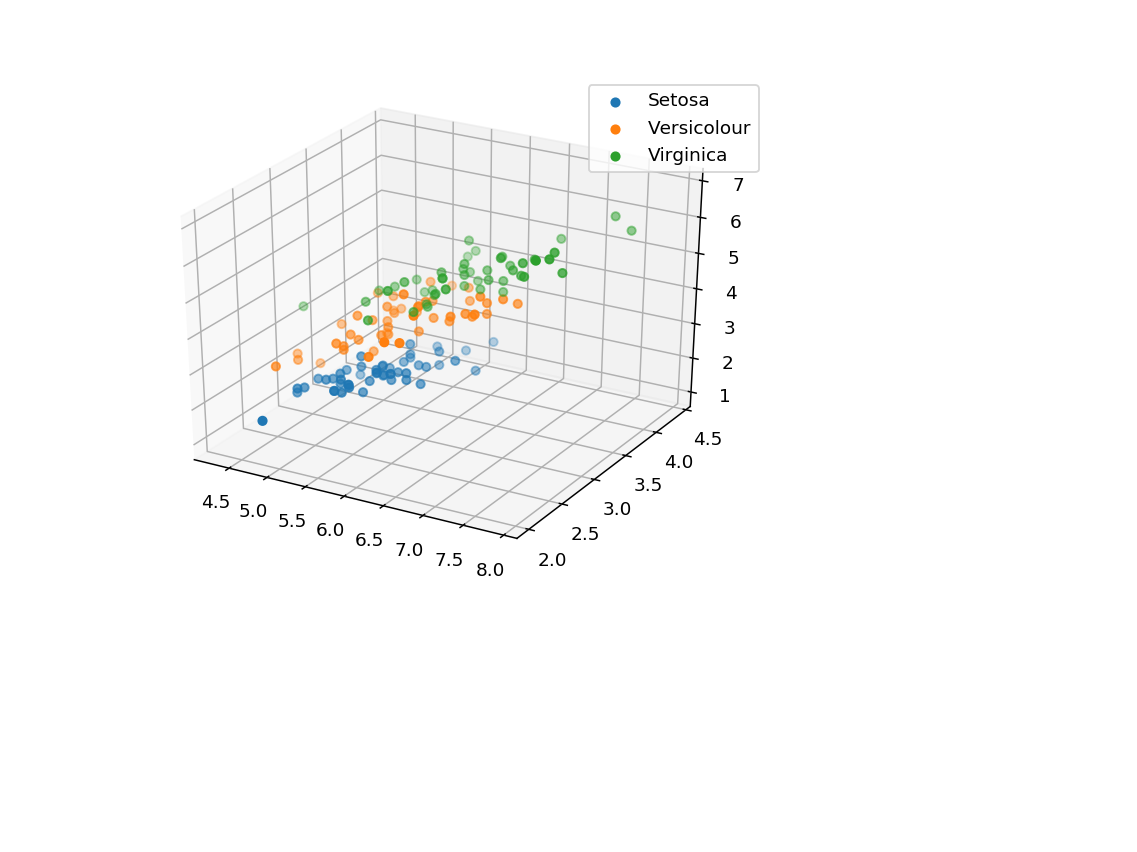

In [3]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
# Let's create a 3d-plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0,0], X[y==0,1], X[y==0,2], label='Setosa')
ax.scatter(X[y==1,0], X[y==1,1], X[y==1,2], label='Versicolour')
ax.scatter(X[y==2,0], X[y==2,1], X[y==2,2], label='Virginica')    
    
plt.legend()
plt.show()

In [4]:
from sklearn import decomposition
# Let's use PCA to go from 4 to 2 dimensions
pca = decomposition.PCA(n_components=2)
# first we perform mean normalization
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
# Or equivalently...
X_pca = pca.fit_transform(X_centered)

We can get the information of the PCA, such as:
- the actual components with `.components_`
- the retained variance per component with `.explained_variance_ratio_`

In [5]:
# Components are a 4x2 array, since we go from 4 dimensions to 2
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [6]:
# Here the retained variance is about 92% for 1st component, 5% for second component
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

We can finally plot the results:

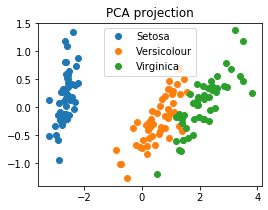

In [7]:
# Then we plot the results of PCA
%matplotlib inline
plt.figure(figsize=(4, 3))
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'o', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'o', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'o', label='Virginica')
plt.legend(loc=0)
plt.title('PCA projection')
plt.show()